In [426]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
wineSet = pd.read_csv("winequality-white.csv",';')

In [60]:
wineSetNorm = wineSet.copy()
del wineSetNorm['quality']

wineSetNorm = pd.DataFrame(normalize(wineSet,'l2'))
cols = list(wineSetNorm.columns)
cols.insert(0,'x0')
wineSetNorm['x0'] = 1
wineSetNorm = wineSetNorm[cols]
wineSetNorm['12'] = wineSet.quality

msk = np.random.rand(len(wineSet)) < 0.7
train = wineSetNorm[msk]
test = wineSetNorm[~msk]

wineSetNorm.values.shape


(4898, 14)

In [70]:
def coefficients(learnRate,train,epochs):
    numFeatures = train.shape[1]-1
    coeff = np.random.rand(numFeatures)
    costFunc = []
    for epoch in range(epochs):            
        for row in train.values:              
            xVet = row[0:-1]           
            y = row[-1]
            ypred = xVet.dot(coeff.T)
            error = (ypred - y)
            costFunc.append(error**2)
            coeff = coeff - learnRate*error*xVet
    return coeff, costFunc



In [71]:
def predict(testSet,coeff):
    XTest = testSet.values[:,0:-1]
    yTest = testSet.values[:,-1]
    yPred = XTest.dot(coeff)

    RMSE = np.sqrt(sum(yTest - yPred)**2/len(yTest))
    return RMSE


In [153]:
epochs = 100
coeff,costFunc = coefficients(0.001,train,epochs)


RMSE = predict(test,coeff)
print(RMSE)



0.0647444044523


(-10, 50)

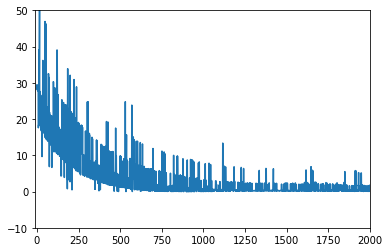

In [150]:
plt.plot((costFunc))
plt.xlim([-10, 2000])
plt.ylim([-10, 50])

In [154]:
# Normal Equation: Ordinary least Means Square
XTrain = train.values[:,0:-1]
yTrain = train.values[:,-1]
coeff = np.linalg.pinv(XTrain).dot(yTrain)

RMSE = predict(test,coeff)
print(RMSE)



0.0513572656698
